# Plot HW 1

## Task 1

Modify your uniform density sphere code to simulate the time-dependent leakage of packets from the outer edge of a sphere of radius 1 metre. Assume the sphere is illuminated by a central isotropic point source of radiation. You should produce a figure that plots number of packets against the time it takes them to travel from the source to the edge of the sphere (i.e., bin the packets according to their total time of flight in the sphere and assume they travel at the speed of light). Assume the scattering albedo is unity, and present results on a single figure for simulations with radial optical depths 0.1, 1, 10, 30, 100.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import ipywidgets as widgets

In [2]:
bins = []
counts = []

# Open and read the text file
with open('HW1_1.txt', 'r') as file:
    for line in file:
        parts = line.split()
        bins.append(float(parts[0]))
        counts.append(float(parts[1]))
        
bins = np.transpose(bins)
bins = bins*10**9 # convert to ns
counts = np.transpose(counts)
#print(np.sum(counts[0:index_factor-1]))                   #Check that photons are being binned
#print(np.sum(counts[index_factor:2*index_factor-1]))
#print(np.sum(counts[2*index_factor:3*index_factor-1]))
#print(np.sum(counts[3*index_factor:4*index_factor-1]))
#print(np.sum(counts[4*index_factor:5*index_factor-1]))

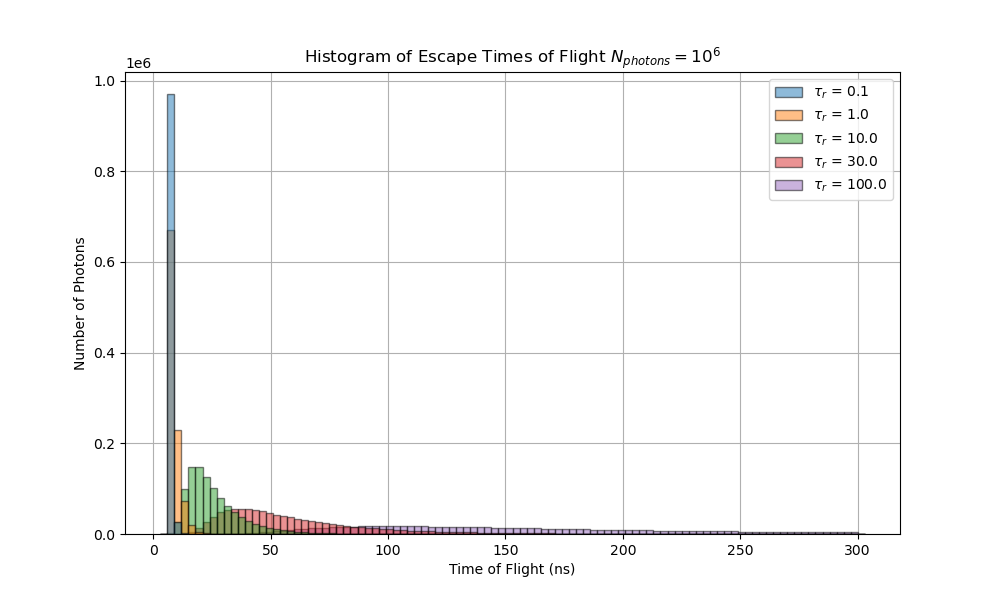

In [3]:
tau_rs = [0.1, 1.0, 10.0, 30.0, 100.0]
n = len(tau_rs)
index_factor = int(len(bins)/n) #How many bins correspond to each tau_r
bw = (bins[index_factor-1])/index_factor

%matplotlib widget
fig = plt.figure(figsize = (10,6))
plt.title(r'Histogram of Escape Times of Flight $N_{photons} = 10^6$')
plt.ylabel('Number of Photons')
plt.xlabel('Time of Flight (ns)')
for i in range(n): 
    index = index_factor*i
    plt.bar(bins[index:index_factor+index], counts[index:index_factor+index], width = bw, edgecolor='black', align='edge', alpha=0.5, label = r'$\tau_r$ = ' + str(tau_rs[i]), zorder = 10-i)
plt.legend()
plt.grid()
plt.show()

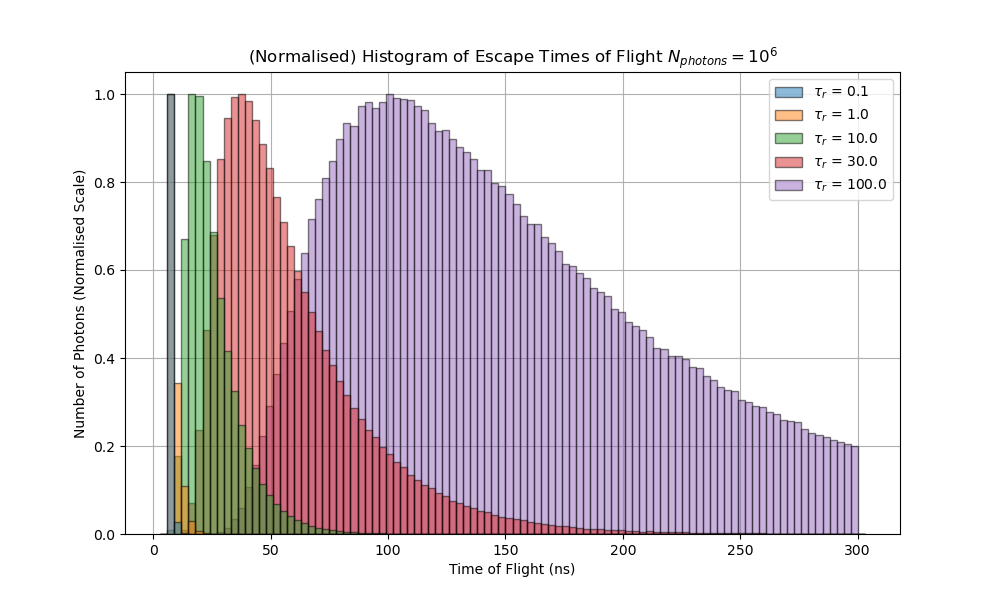

In [4]:
%matplotlib widget
fig = plt.figure(figsize = (10,6))
plt.title(r'(Normalised) Histogram of Escape Times of Flight $N_{photons} = 10^6$')
plt.ylabel('Number of Photons (Normalised Scale)')
plt.xlabel('Time of Flight (ns)')
for i in range(n): 
    index = index_factor*i
    plt.bar(bins[index:index_factor+index], counts[index:index_factor+index]/np.max(counts[index:index_factor+index]), width = bw, edgecolor='black', align='edge', alpha=0.5, label = r'$\tau_r$ = ' + str(tau_rs[i]), zorder = 10-i)
plt.legend()
plt.grid()
plt.show()

## Task 2

Modify your uniform density sphere code to implement the variance reduction algorithms
of “forced first scattering” and “Roulette” and for a simulation with a central isotropic source
compute the volume density of absorbed power as a function of radius within the sphere.
Present results for simulations of uniform density spheres with scattering albedos of 0.2 and
0.6 and radial optical depths 0.2, 1, 5, and 20. Test your code modifications by comparing
with simulations without variance reduction algorithms

In [5]:
bins2 = []
counts2 = []

# Open and read the text file
with open('HW1_2.txt', 'r') as file:
    for line in file:
        #print(line)
        parts = line.split()
        bins2.append(float(parts[0]))
        counts2.append(float(parts[1]))
        
bins2 = np.transpose(bins2) #Units of rmax
counts2 = np.transpose(counts2)
tau_rs2 = [0.2, 1.0, 5.0, 20.0]
albedos2 = [0.2,0.6]

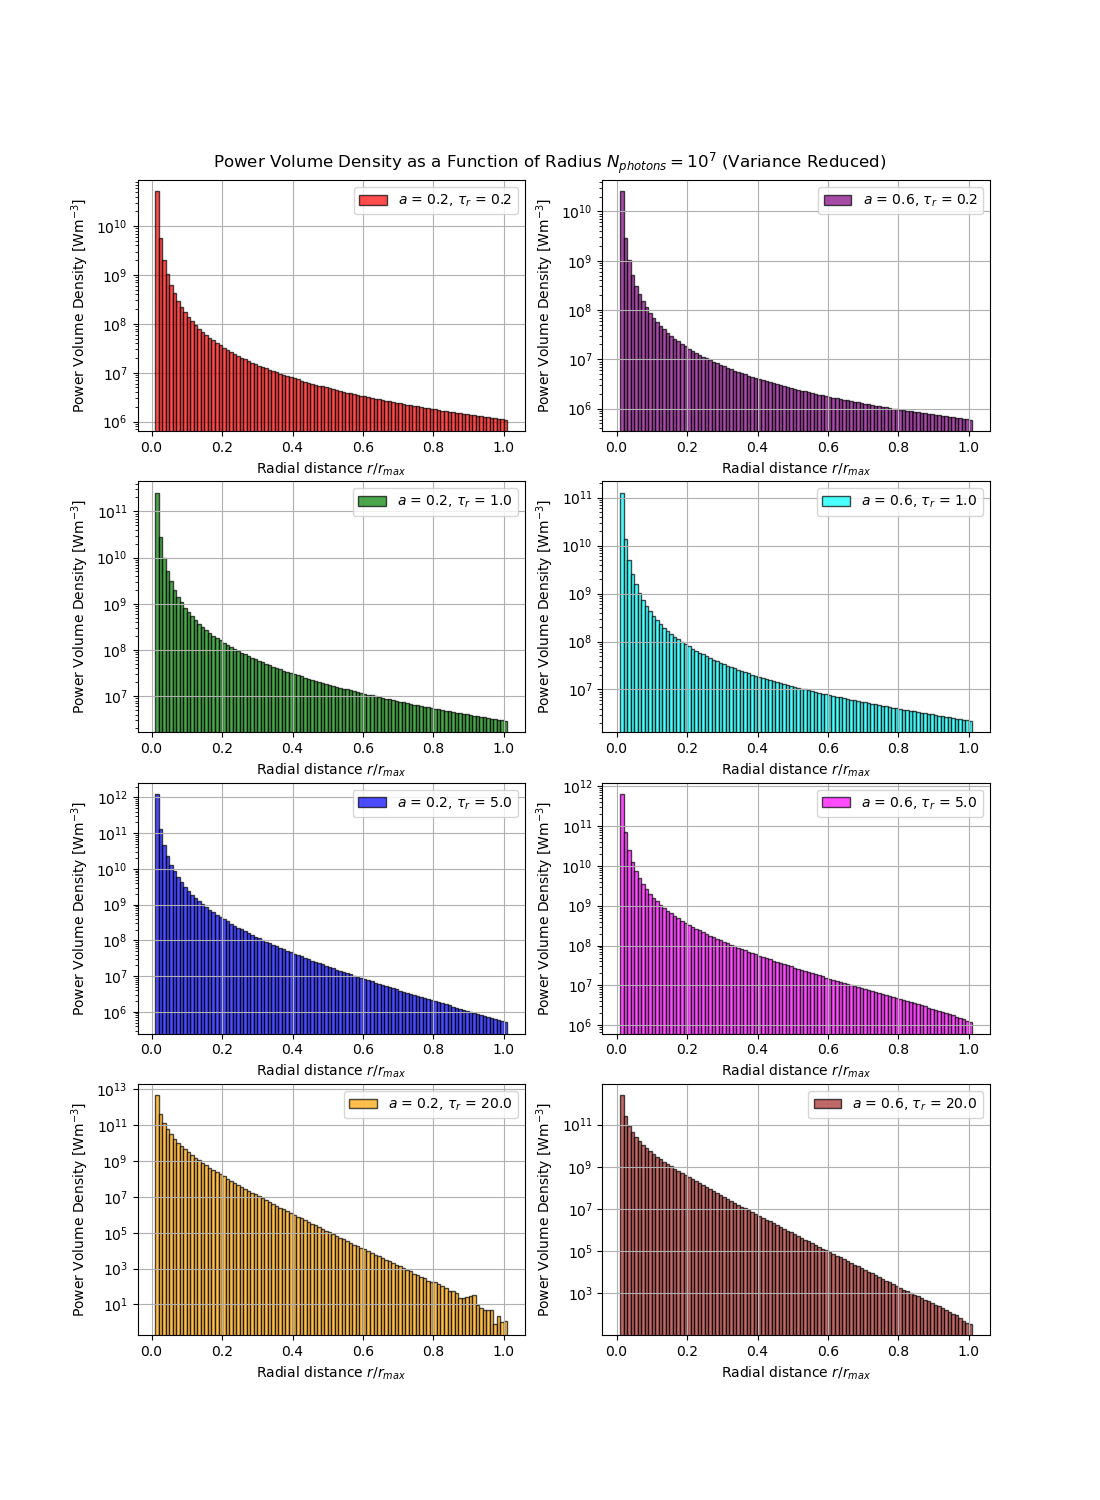

In [6]:
n2 = len(albedos2)
n3 = len(tau_rs2)
index_factor2 = int(len(bins2)/(n2*n3)) #How many values correspond to each tau_r and a combination.
%matplotlib widget
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'brown']
fig, ax = plt.subplots(n3, n2, figsize=(11, 15))
fig.suptitle(r'Power Volume Density as a Function of Radius $N_{photons} = 10^7$ (Variance Reduced)',  y=0.9)
for i in range(n2):
    for j in range(n3):
        index2 = index_factor2*(4*i+j)
        ax[j,i].set_xlabel(r'Radial distance $r/r_{max}$')
        ax[j,i].set_ylabel('Power Volume Density $\mathrm{[W m^{-3}]}$')
        #plt.plot(bins2[index2:index_factor2+index2], counts2[index2:index_factor2+index2], label = r'$a$ = '+str(albedos2[i])+', $\\tau_r$ = '+str(tau_rs2[j]))
        ax[j,i].bar(bins2[index2:index_factor2+index2], counts2[index2:index_factor2+index2], 
            align='edge', alpha=0.7, width=0.01, edgecolor='black', color = colors[4*i+j], label = r'$a$ = '+str(albedos2[i])+', $\\tau_r$ = '+str(tau_rs2[j]), zorder = 10 - index2)
        ax[j,i].legend()
        ax[j,i].set_yscale('log')
        ax[j,i].grid()
plt.show()

In [7]:
bins3 = []
counts3 = []

# Open and read the text file
with open('HW1_3.txt', 'r') as file:
    for line in file:
        parts = line.split()
        bins3.append(float(parts[0]))
        counts3.append(float(parts[1]))
        
bins3 = np.transpose(bins3) #Units of rmax
counts3 = np.transpose(counts3)
#bins2

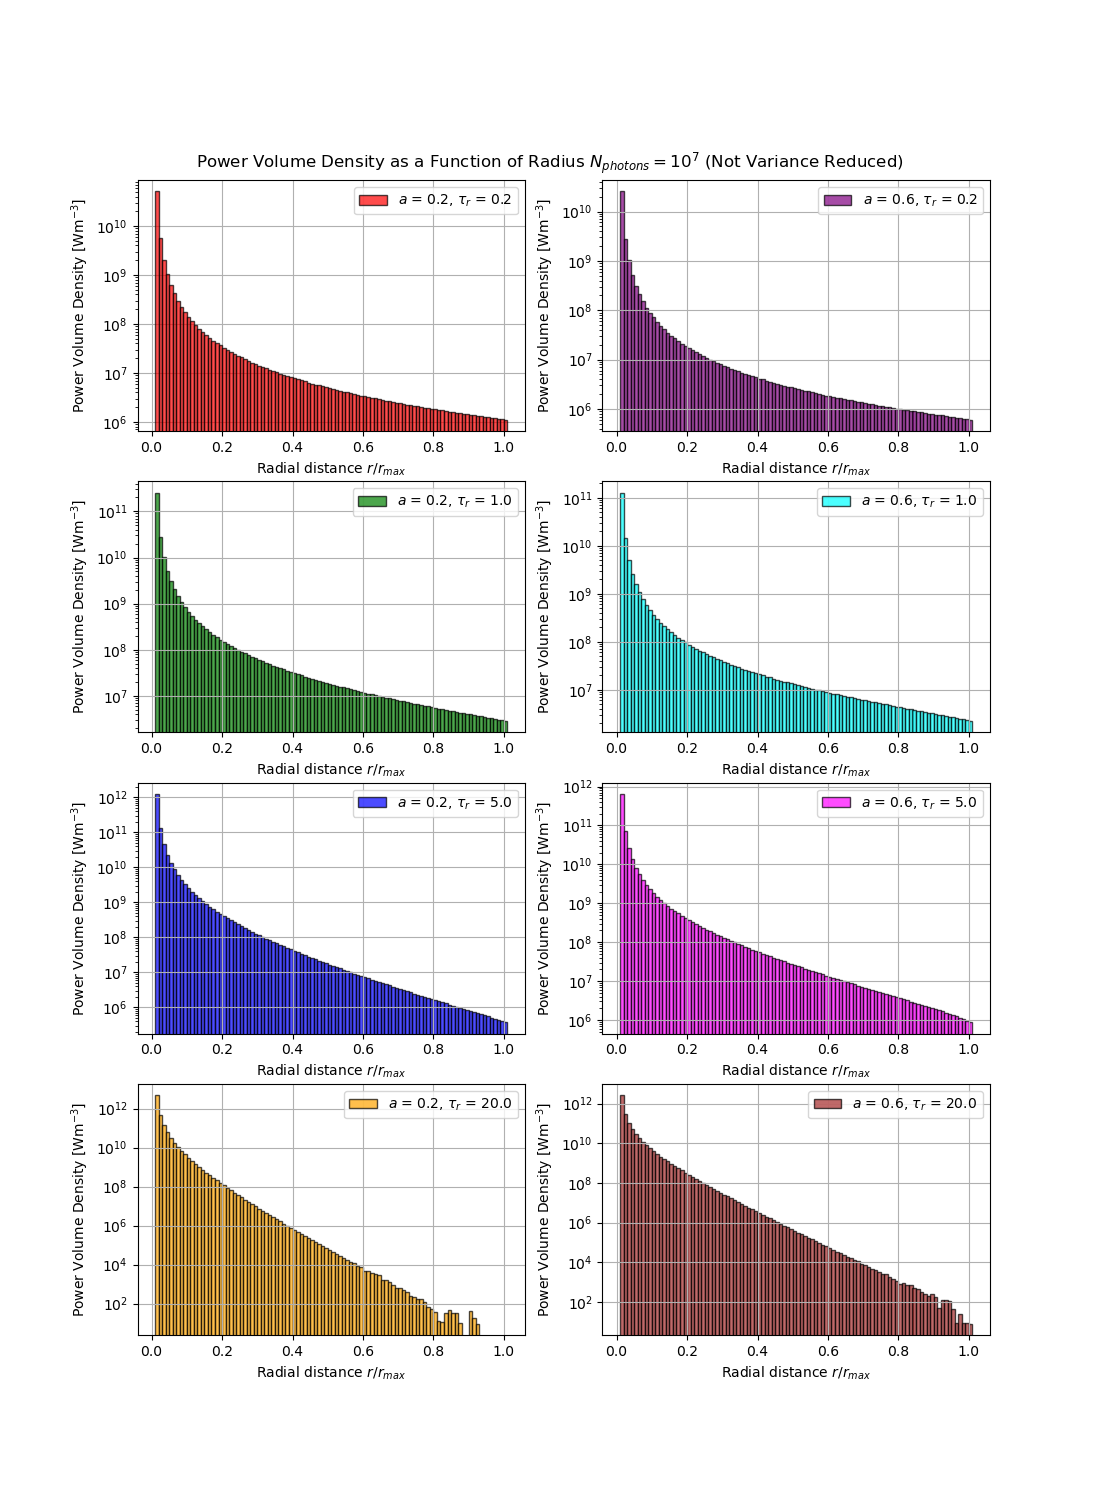

In [8]:
%matplotlib widget
fig, ax = plt.subplots(n3, n2, figsize=(11, 15))
fig.suptitle(r'Power Volume Density as a Function of Radius $N_{photons} = 10^7$ (Not Variance Reduced)',  y=0.9)
for i in range(n2):
    for j in range(n3):
        index2 = index_factor2*(4*i+j)
        ax[j,i].set_xlabel(r'Radial distance $r/r_{max}$')
        ax[j,i].set_ylabel('Power Volume Density $\mathrm{[W m^{-3}]}$')
        ax[j,i].bar(bins3[index2:index_factor2+index2], counts3[index2:index_factor2+index2], 
            align='edge', alpha=0.7, width=0.01, edgecolor='black', color = colors[4*i+j], label = r'$a$ = '+str(albedos2[i])+', $\\tau_r$ = '+str(tau_rs2[j]), zorder = 10 - index2)
        ax[j,i].legend()
        ax[j,i].set_yscale('log')
        ax[j,i].grid()
plt.show()

### Comparison

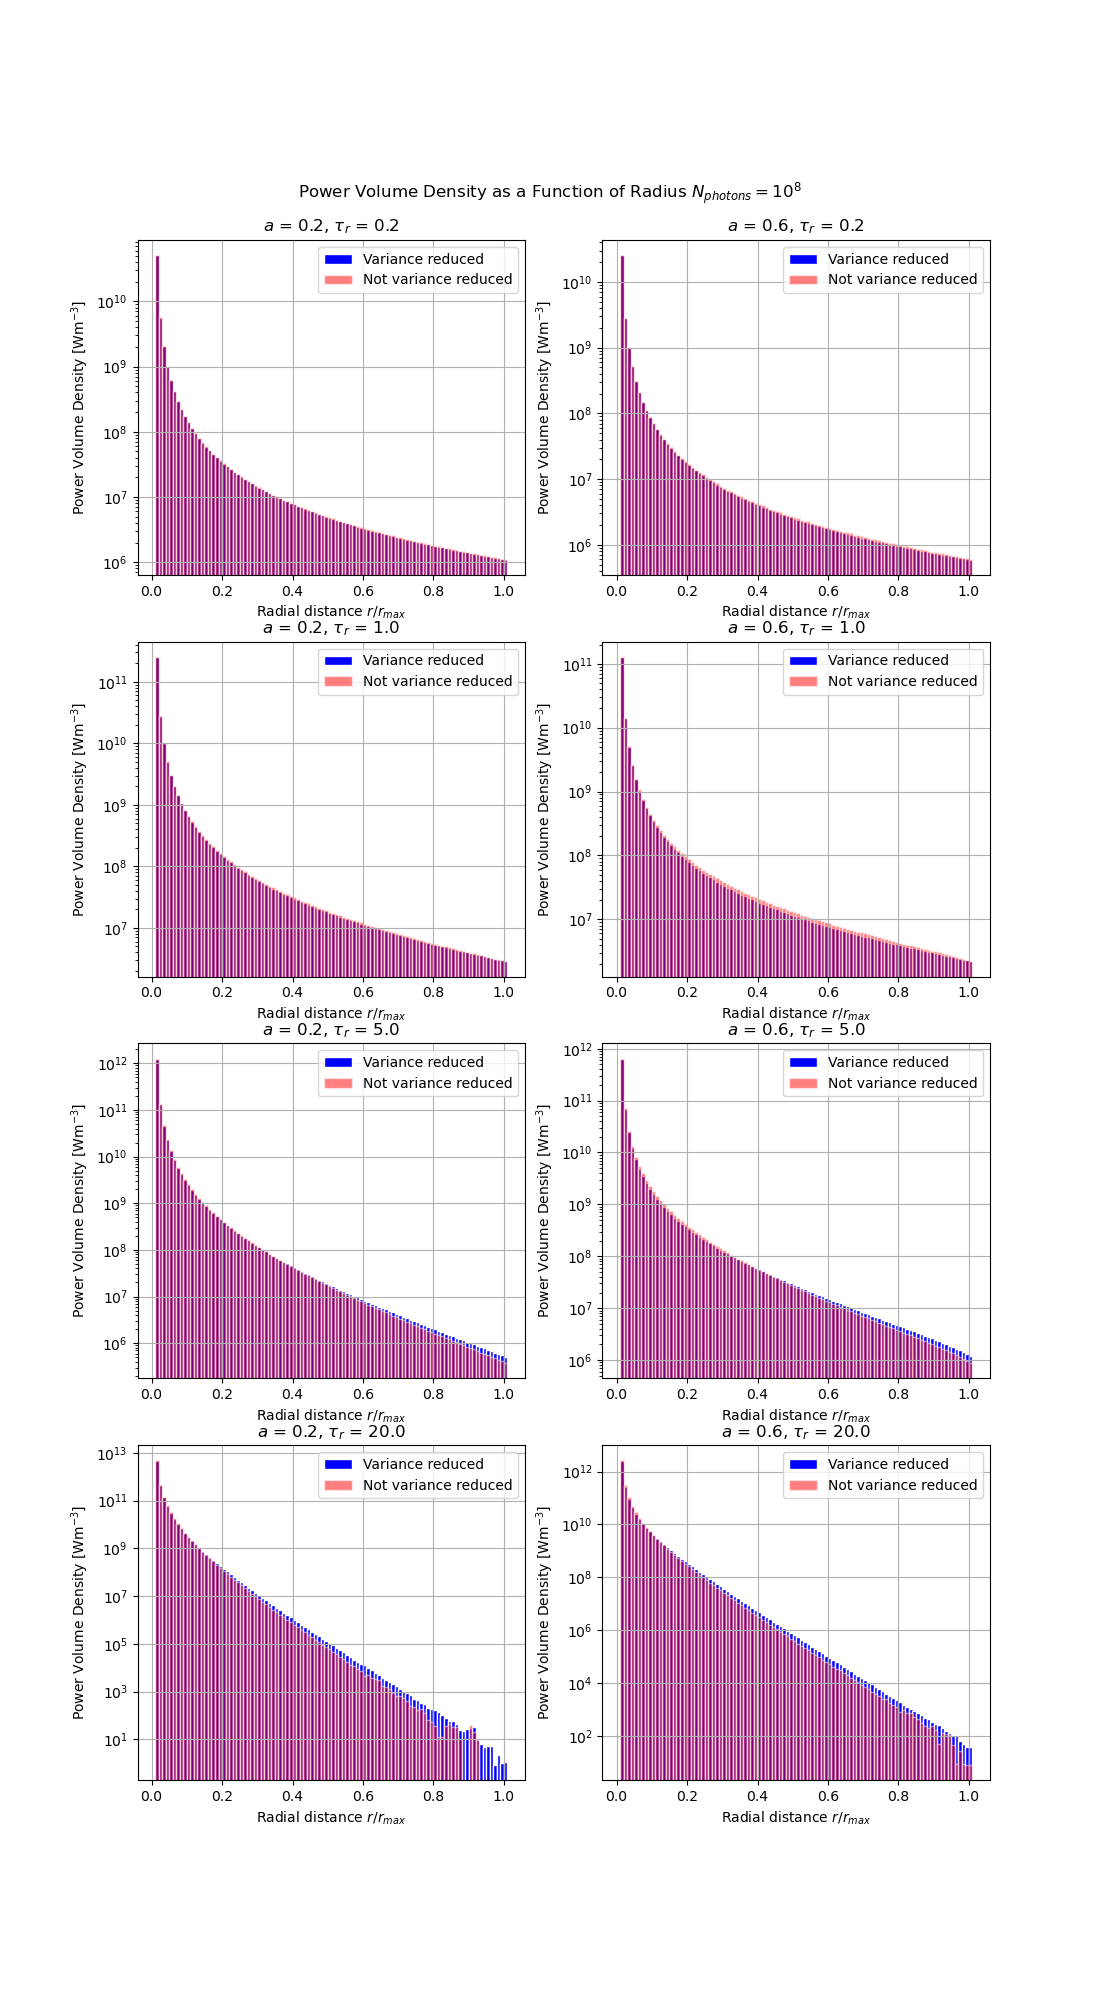

In [9]:
%matplotlib widget
fig, ax = plt.subplots(n3, n2, figsize=(11, 20))
fig.suptitle(r'Power Volume Density as a Function of Radius $N_{photons} = 10^8$',  y=0.91)
for i in range(n2):
    for j in range(n3):
        index2 = index_factor2*(4*i+j)
        ax[j,i].set_title(r'$a$ = '+str(albedos2[i])+', $\\tau_r$ = '+str(tau_rs2[j]))
        ax[j,i].set_xlabel(r'Radial distance $r/r_{max}$')
        ax[j,i].set_ylabel('Power Volume Density $\mathrm{[W m^{-3}]}$')
        ax[j,i].bar(bins2[index2:index_factor2+index2], counts2[index2:index_factor2+index2], 
            align='edge', width=0.01, color = 'blue', edgecolor='w', label = 'Variance reduced')
        ax[j,i].bar(bins3[index2:index_factor2+index2], counts3[index2:index_factor2+index2], 
            align='edge', alpha=0.5, width=0.01, color = 'red', edgecolor='w', label = 'Not variance reduced')
        ax[j,i].legend()
        ax[j,i].set_yscale('log')
        ax[j,i].grid()
plt.show()